<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [7]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


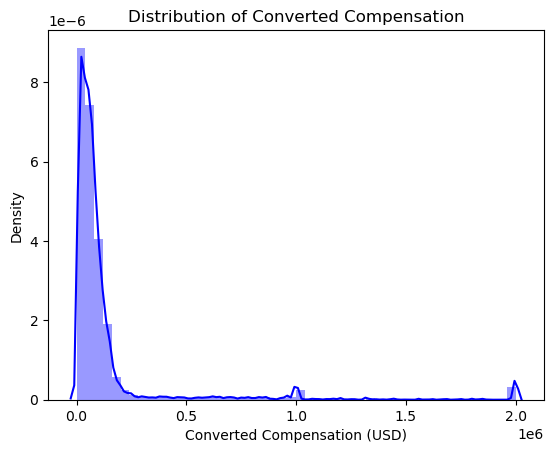

In [13]:
# Create a density plot with a histogram using seaborn
sns.distplot(df['ConvertedComp'], kde=True, bins=50, color='blue')

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Converted Compensation')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


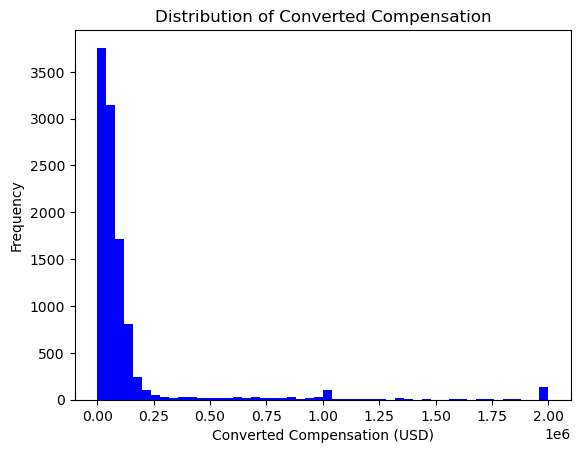

In [14]:
# your code goes here
# Create a histogram of the ConvertedComp column
plt.hist(df['ConvertedComp'], bins=50, color='blue')

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_salary = df['ConvertedComp'].median()

print("The median salary is: ", median_salary)

The median salary is:  57745.0


How many responders identified themselves only as a **Man**?


In [17]:
# Count the number of occurrences of "Man" in the "Gender" column
man_count = (df['Gender'] == 'Man').sum()

print("There are {} occurrences of 'Man' in the 'Gender' column.".format(man_count))

There are 10480 occurrences of 'Man' in the 'Gender' column.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
# Calculate the median ConvertedComp for responses from women only
median_women = df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()

print("The median ConvertedComp for women respondents is: ", median_women)

The median ConvertedComp for women respondents is:  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
# Summarize the 'Age' column
age_summary = df['Age'].describe()

print(age_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


In [31]:
median_age = df['Age'].median()
print("Median age:", median_age)

Median age: 29.0


Plot a histogram of the column `Age`.


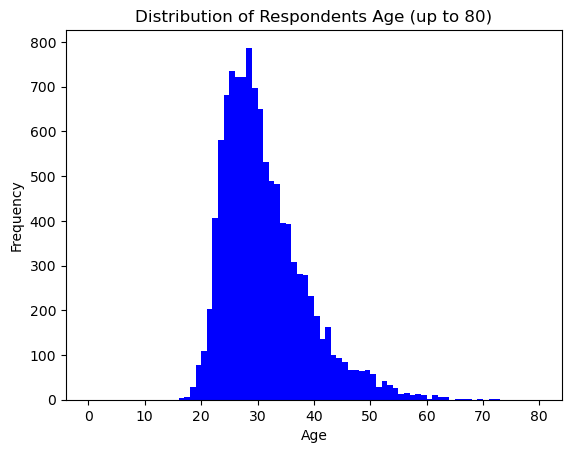

In [30]:
# Create a histogram of the 'Age' column with range up to 80
plt.hist(df['Age'], bins=80, range=(0, 80), color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Respondents Age (up to 80)')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


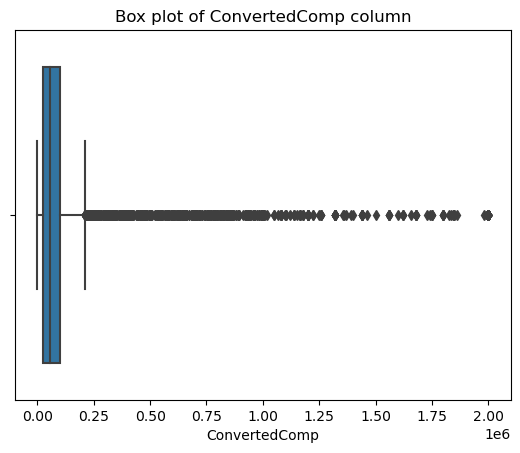

In [35]:
# your code goes here
# Create a box plot of the 'ConvertedComp' column
sns.boxplot(x=df['ConvertedComp'])

# Add a title to the plot
plt.title('Box plot of ConvertedComp column')

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


Inter Quartile Range (IQR): 73132.0


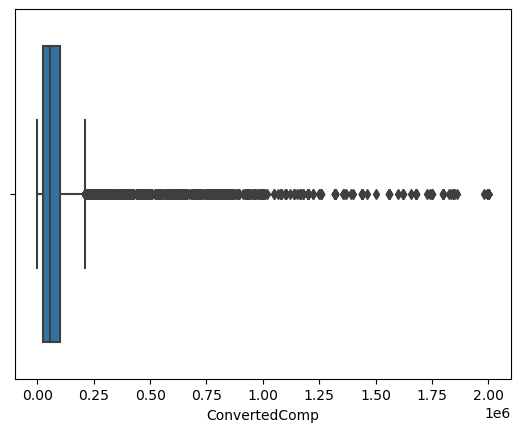

In [36]:
# your code goes here
# Create a box plot for the ConvertedComp column
sns.boxplot(x=df['ConvertedComp'])

# Calculate the IQR using the quantile method
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

print('Inter Quartile Range (IQR):', iqr)

Find out the upper and lower bounds.


In [37]:
# your code goes here
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound:', upper_bound)
print('Lower bound:', lower_bound)

Upper bound: 209698.0
Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [38]:
# your code goes here
outliers = df.loc[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound), 'ConvertedComp']

# Count the number of outliers
num_outliers = len(outliers)

print('Number of outliers:', num_outliers)

Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [40]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Create a new dataframe without the outliers
df_no_outliers = df.loc[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [42]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_salary = df_no_outliers['ConvertedComp'].median()

print("The median salary is: ", median_salary)

The median salary is:  52704.0


In [ ]:
# Calculate the median of the ConvertedComp column
median_salary = df_no_outliers['ConvertedComp'].median()

print("The median salary is: ", median_salary)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
